In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
smarket = pd.read_csv('data/Smarket.csv', index_col=0)
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
smarket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 97.7+ KB


In [4]:
smarket_train = smarket[smarket['Year']<2005]
smarket_test = smarket[smarket['Year']>=2005]

In [5]:
lda = LDA().fit(smarket_train[['Lag1', 'Lag2']], smarket_train['Direction'])

In [25]:
print(dir(lda))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_max_components', '_more_tags', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_solve_eigen', '_solve_lsqr', '_solve_svd', '_validate_data', 'classes_', 'coef_', 'decision_function', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_params', 'intercept_', 'means_', 'n_components', 'n_features_in_', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'priors_', 'scalings_', 'score', 'set_params', 'shrinkage', 'solver', 'store_covariance', 'tol', 'transform', 'xbar_']


In [35]:
print(lda.classes_)

['Down' 'Up']


In [6]:
print(lda.priors_)

[0.49198397 0.50801603]


In [7]:
print(lda.means_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [8]:
print(lda.coef_)

[[-0.05544078 -0.0443452 ]]


In [9]:
prediction_test = lda.predict(smarket_test[['Lag1', 'Lag2']])
np.unique(prediction_test, return_counts=True)

(array(['Down', 'Up'], dtype='<U4'), array([ 70, 182]))

In [10]:
pd.DataFrame(confusion_matrix(prediction_test, smarket_test['Direction']), 
                ['Pred Down', 'Pred Up'], ['Down', 'Up'])

,Down,Up
Pred Down,35,35
Pred Up,76,106


In [11]:
print(classification_report(smarket_test['Direction'], prediction_test))

              precision    recall  f1-score   support

        Down       0.50      0.32      0.39       111
          Up       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252



In [12]:
print('Accuracy average: %.2f ' %(np.mean(prediction_test==smarket_test['Direction'])*100)+'%')

Accuracy average: 55.95 %


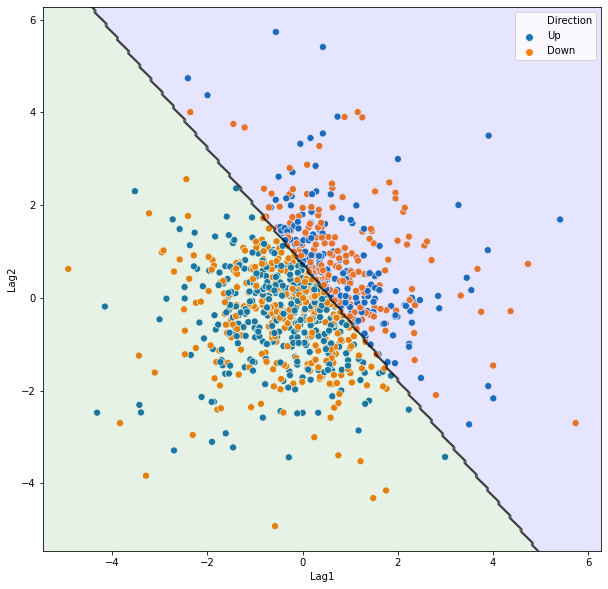

In [13]:
plt.figure(figsize=(10,10))
sb.scatterplot(data=smarket_train, x='Lag1', y='Lag2', hue='Direction', s=50)
# Create Bayes Decision Boundary
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 200)
Y = np.linspace(y_min, y_max, 200)
X, Y = np.meshgrid(X, Y)
Z_prob = lda.predict_proba(np.c_[X.ravel(), Y.ravel()])[:,0]
threshold = 0.5
Z = np.array([0 if x > threshold else 1 for x in Z_prob]).reshape(X.shape)
# Z = Z[:, 1].reshape(xx.shape)
plt.contour(X, Y, Z, linewidths=0.3, colors='k')
plt.contourf(X, Y, Z, 1, alpha=0.1, colors = ('blue', 'green'), labels=('Down', 'Up'))

# Plot means each class
# plt.plot(lda.means_[0][0], lda.means_[0][1], 'o', color='blue', markersize=10)
# plt.plot(lda.means_[1][0], lda.means_[1][1], 'o', color='red', markersize=10)

plt.legend()
plt.show()

In [14]:
X

array([[-5.45475   , -5.39585302, -5.33695603, ...,  6.14795603,
         6.20685302,  6.26575   ],
       [-5.45475   , -5.39585302, -5.33695603, ...,  6.14795603,
         6.20685302,  6.26575   ],
       [-5.45475   , -5.39585302, -5.33695603, ...,  6.14795603,
         6.20685302,  6.26575   ],
       ...,
       [-5.45475   , -5.39585302, -5.33695603, ...,  6.14795603,
         6.20685302,  6.26575   ],
       [-5.45475   , -5.39585302, -5.33695603, ...,  6.14795603,
         6.20685302,  6.26575   ],
       [-5.45475   , -5.39585302, -5.33695603, ...,  6.14795603,
         6.20685302,  6.26575   ]])

In [15]:
lda.predict(smarket_test[['Lag1', 'Lag2']])

array(['Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 

In [16]:
predict_thres = np.array(['Up' if x < 0.49 else 'Down' for x in lda.predict_proba(smarket_test[['Lag1', 'Lag2']])[:,0]])
predict_thres

array(['Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Down',
       'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down',
       'Down', 'Up', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down',
       'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up',
       'Down', 'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up'

In [17]:
qda = QDA().fit(smarket_train[['Lag1', 'Lag2']], smarket_train['Direction'])
qda.priors_

array([0.49198397, 0.50801603])

In [18]:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [19]:
prediction_test_2 = qda.predict(smarket_test[['Lag1','Lag2']])
np.unique(prediction_test_2, return_counts=True)

(array(['Down', 'Up'], dtype=object), array([ 50, 202]))

In [20]:
pd.DataFrame(confusion_matrix(prediction_test_2, smarket_test['Direction']), ['Pred Down', 'Pred Up'], ['Down', 'Up'])

,Down,Up
Pred Down,30,20
Pred Up,81,121


In [21]:
np.mean(smarket_test['Direction']==prediction_test_2)

0.5992063492063492

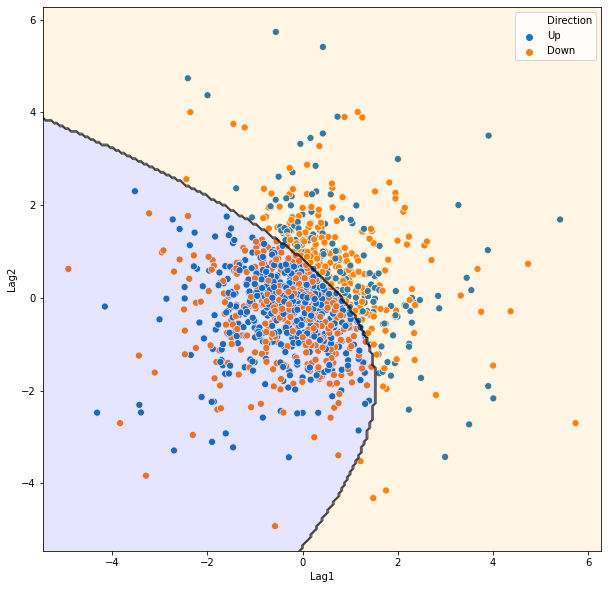

In [22]:
# Create scatter plot
plt.figure(figsize=(10,10))
sb.scatterplot(data=smarket, x='Lag1', y='Lag2', hue='Direction', s=50)
# Create Bayes Decision Boundary
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 200)
Y = np.linspace(y_min, y_max, 200)
X, Y = np.meshgrid(X, Y)
Z_prob = qda.predict_proba(np.c_[X.ravel(), Y.ravel()])[:,0]
threshold = 0.5
Z = np.array([0 if x > threshold else 1 for x in Z_prob]).reshape(X.shape)
# Z = Z[:, 1].reshape(xx.shape)
plt.contour(X, Y, Z, linewidths=0.3, colors='k')
plt.contourf(X, Y, Z, 1, alpha=0.1, colors = ('orange', 'blue'), labels=('Down', 'Up'))

plt.show()

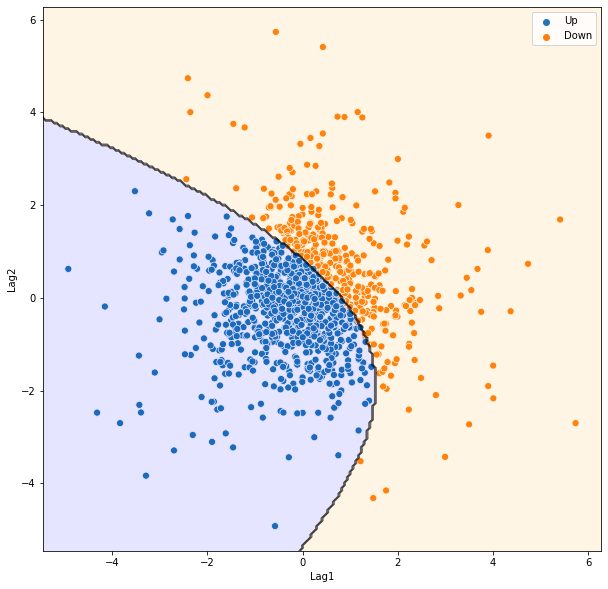

In [23]:
# Create scatter plot
plt.figure(figsize=(10,10))
sb.scatterplot(data=smarket, x='Lag1', y='Lag2', hue=qda.predict(smarket[['Lag1', 'Lag2']]), s=50)
# Create Bayes Decision Boundary
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 200)
Y = np.linspace(y_min, y_max, 200)
X, Y = np.meshgrid(X, Y)
Z_prob = qda.predict_proba(np.c_[X.ravel(), Y.ravel()])[:,0]
threshold = 0.5
Z = np.array([0 if x > threshold else 1 for x in Z_prob]).reshape(X.shape)
# Z = Z[:, 1].reshape(xx.shape)
plt.contour(X, Y, Z, linewidths=0.3, colors='k')
plt.contourf(X, Y, Z, 1, alpha=0.1, colors = ('orange', 'blue'), labels=('Down', 'Up'))

plt.show()